# Homework 4

## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propsensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.




In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import networkx as nx
from networkx.algorithms import bipartite

%matplotlib inline

In [5]:
data_lalonde = pd.read_csv(r'lalonde.csv')
data_lalonde.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


First let's do a little describe to see what we have here

In [6]:
data_lalonde.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


Nothing really special to say here. These value do not mean much by themselves. They just show some basic information. Let's answer question 1 now:

In [63]:
index_treat = data_lalonde["treat"] == 1
index_no_treat = data_lalonde["treat"] == 0
data_lalonde_treat = data_lalonde[index_treat]
data_lalonde_no_treat = data_lalonde[index_no_treat]

Just checking of there are no "outliers":

In [64]:
data_lalonde_treat.shape[0] + data_lalonde_no_treat.shape[0] == data_lalonde.shape[0]

True

Populating the interactive namespace from numpy and matplotlib


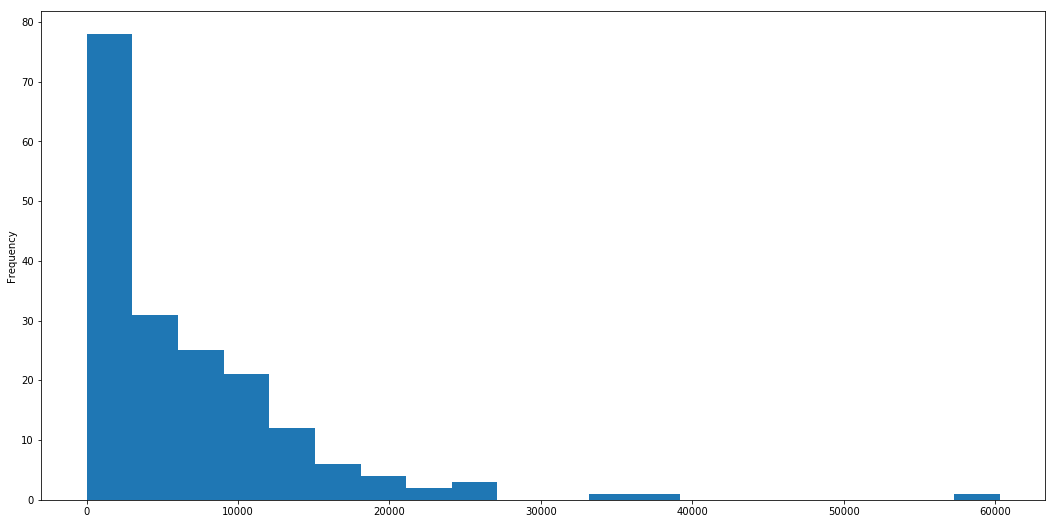

In [65]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 9)
plt.figure()

data_lalonde_treat.re78.plot.hist(bins=20)

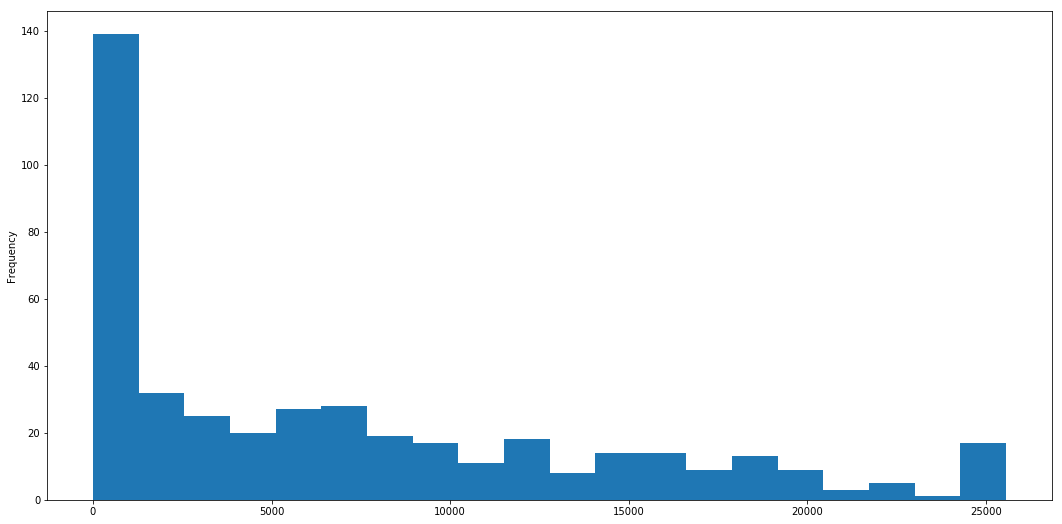

In [66]:
data_lalonde_no_treat.re78.plot.hist(bins=20)

Maybe not informative enough. We see that there are a few "outliers" in the treat case but generally speaking there are still more people on the left. Let's try to put everything on the same histogram so as to make the information clearer with respect to the scale.

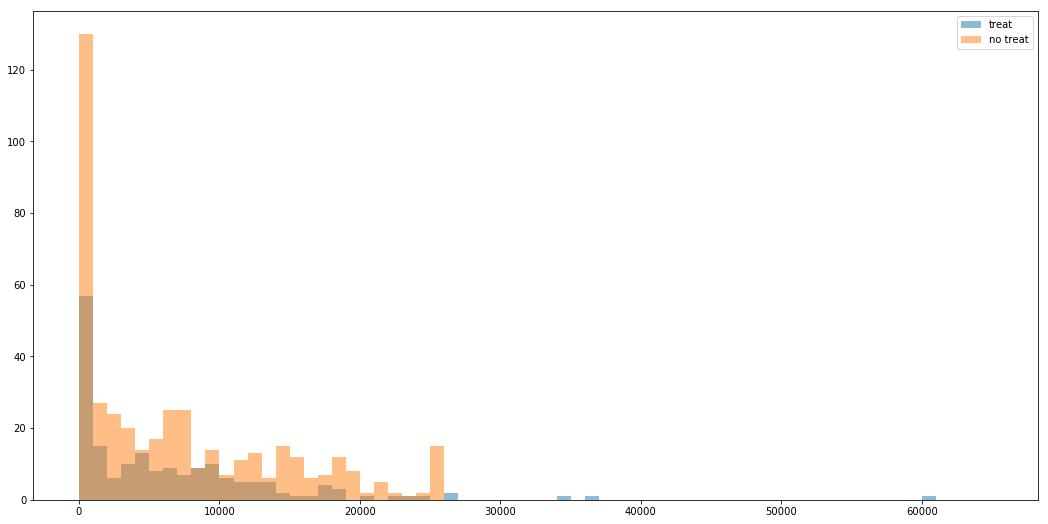

In [67]:
bins = np.linspace(0, 65000, 66)

plt.hist(data_lalonde_treat.re78.tolist(), bins, alpha=0.5, label="treat")
plt.hist(data_lalonde_no_treat.re78.tolist(), bins, alpha=0.5, label="no treat")

plt.legend(loc="upper right")
plt.show()

This doesn't tell us much about the data to be honest. We clearly see that there are some outliers who make a lot of money on the far right but they are a minority so we cannot say something about that. Let's describe the two dataframes:

In [68]:
data_lalonde_treat.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.0,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530
std,0.0,7.155019,2.010650,0.364558,0.237124,0.392722,0.455867,4886.620353,3219.250870,7867.402218
min,1.0,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,20.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,485.229800
50%,1.0,25.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4232.309000
75%,1.0,29.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1291.468000,1817.284000,9642.999000
max,1.0,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


In [70]:
data_lalonde_no_treat.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,429.0,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.0,28.030303,10.235431,0.202797,0.142191,0.512821,0.596737,5619.236506,2466.484443,6984.169742
std,0.0,10.786653,2.855238,0.402552,0.349654,0.500419,0.491126,6788.750796,3291.996183,7294.161791
min,0.0,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,19.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.181300
50%,0.0,25.000000,11.000000,0.000000,0.000000,1.000000,1.000000,2547.047000,1086.726000,4975.505000
75%,0.0,35.000000,12.000000,0.000000,0.000000,1.000000,1.000000,9277.128000,3881.419000,11688.820000
max,0.0,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,25862.320000,18347.230000,25564.670000


Now we see that the value has nothing special to do with treat or no treat. Somehow we see that the selection was far from uniform at random. In the treat group there are more people with no degree than with degree. The "black" variable is interesting also. We intuitively make associate the fact that there are a lot more black people to more difficult social conditions. We can also note that there is a three years difference in mean age between the two groups so, in a sense, we guess that people in the no treat group have more experience on average and this should imply the higher mean salary in the no treat group. We can also say that the age parameter has a lot of impact on the nodegree and the married parameters. Somehow, being 3 years older implies a higher probability of being married and a higher probability of having a degree.

Now we want to measure the propensity scores using logistic regression in order to be able to improve our analysis.

In [73]:
logistic = linear_model.LogisticRegression()

# We won't include re78 since this is the salary after the subject is treated
features = ["age", "educ", "black", "hispan", "married", "nodegree", "re74", "re75"]
X = data_lalonde[features]
y = data_lalonde.treat

logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now let's take a look at the score:

In [80]:
logistic.score(X, y)

0.80781758957654726

Not bad for a start. We are really far from 0.5 which could mean that we are really far from a randomized experiment. Bad this score is not really informative, what we want here is the propensity score measure.

In [89]:
propensity = [b for [a,b] in logistic.predict_proba(X)]

Now we have our propensity scores for all "nodes"

In [92]:
propensity[:5]

[0.44335042297442523,
 0.14465953267416379,
 0.72235463271079448,
 0.66415051691188443,
 0.69828561085601226]

What we want now is to do matching : for example, if we take the first person in our dataset (the one with propensity score 0.443...), we would like to match them with another person whose propensity score is very close to 0.44 but which is in the opposite group.

Now we want to separate the dataset into the treat and no treat groups:

In [107]:
data_propensity = data_lalonde.copy()
data_propensity["propensity"] = propensity

data_treat_propensity = data_propensity[data_propensity.treat == 1]
data_no_treat_propensity = data_propensity[data_propensity.treat == 0]

Now let's go and create a bipartite graph. So our first strategy (we will find another one if this one doesn't work) is that the weight of the edge between the two nodes is the absolute difference in propensity scores between them. And then we will use networkx to find a min-weight matching

In [124]:
range(20)

range(0, 20)

In [131]:
G = nx.Graph()

G.add_nodes_from(range(data_treat_propensity.shape[0]), bipartite=0)
G.add_nodes_from(range(data_no_treat_propensity.shape[0]), bipartite=1)

for i, row_i in data_treat_propensity.iterrows():
    for j, row_j in data_no_treat_propensity.iterrows():
        # Since the method we use is based on max matching we use negative value to get min matching
        G.add_edge(i, j, weight=-abs(row_i["propensity"] - row_j["propensity"]))

Now let us compute the matching (it takes around a minute):

In [142]:
matching_propensity_max_card = nx.max_weight_matching(G, maxcardinality=True)

We can also compute the min weight matching without max cardinality:

In [146]:
matching_propensity = nx.max_weight_matching(G)
matching_propensity

{11: 565,
 24: 595,
 28: 585,
 30: 576,
 33: 570,
 42: 582,
 46: 560,
 52: 573,
 103: 558,
 104: 572,
 558: 103,
 560: 46,
 565: 11,
 570: 33,
 572: 104,
 573: 52,
 576: 30,
 582: 42,
 585: 28,
 595: 24}

But the problem, as we can see, is that we end up with too few datapoints in the end:

In [160]:
def observe_matching(matching, verbose):
    sum_differences = 0
    for (a, b) in matching.items():
        if a < data_treat_propensity.shape[0] / 2:
            propensity_score_a = data_propensity.loc[a]["propensity"]
            propensity_score_b = data_propensity.loc[b]["propensity"]
            diff = abs(propensity_score_a - propensity_score_b)
            if verbose:
                print("Difference between {} and {} is {}".format(a, b, diff))
            sum_differences += diff
    print("Mean difference in prop score is {}".format(sum_differences / len(matching) / 2))
    
observe_matching(matching_propensity, True)

Difference between 33 and 570 is 0.0
Difference between 42 and 582 is 0.0
Difference between 11 and 565 is 0.0
Difference between 46 and 560 is 0.0
Difference between 52 and 573 is 0.0
Difference between 24 and 595 is 0.0
Difference between 28 and 585 is 0.0
Difference between 30 and 576 is 0.0
Mean difference in prop score is 0.0


Here we see the problem with using min matching without max cardinality. The algorithm will compute the "real" min matching and it will only match the points with the same propensity scores for that. We will continue with the matchings we obtained from max cardinality matchings:

In [163]:
observe_matching(matching_propensity_max_card, False)

Mean difference in prop score is 0.02293329747279737


This matching takes into account all datapoints from the treat (the smallest) group. So it has 185 matchings. In general those matchings are pretty good, very similar points are matched with each other. But if we inspect the values we see that there are some "outliers" matchings since all points have to be matched.

(array([ 104.,    4.,    6.,    1.,    7.,    7.,    2.,    0.,   24.,   30.]),
 array([ 0.        ,  0.05796474,  0.11592949,  0.17389423,  0.23185898,
         0.28982372,  0.34778847,  0.40575321,  0.46371795,  0.5216827 ,
         0.57964744]),
 <a list of 10 Patch objects>)

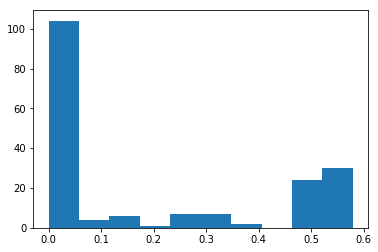

In [174]:
propensity_differences_matchings = list(filter(lambda x : x[0] < 185, 
                                               map(lambda matching: (matching[0], abs(data_propensity.loc[matching[0]]["propensity"] - data_propensity.loc[matching[1]]["propensity"])), 
                                                   matching_propensity_max_card.items())))
propensity_differences_matchings = [prop for (index, prop) in propensity_differences_matchings]
plt.hist(propensity_differences_matchings)

Looking at this histogram we see that there are some bothering matchings where the differences in propensity scores are more than 0.5. A third alternative may be to apply a threshold after the matching to get rid of those values but let's already see how far we can go with our 185-matchings set

Now let's look at the re78 values for both groups but we will take into account only the matched datapoints

In [183]:
group_treat = [a for (a, b) in matching_propensity_max_card.items() if a < data_treat_propensity.shape[0]]
group_no_treat = [b for (a, b) in matching_propensity_max_card.items() if a < data_treat_propensity.shape[0]]

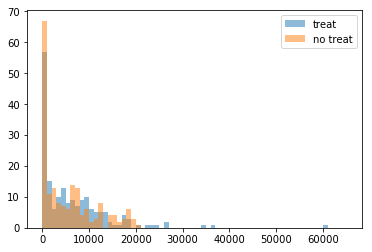

In [189]:
bins = np.linspace(0, 65000, 66)
plt.hist(data_lalonde.loc[group_treat].re78.tolist(), bins, alpha=0.5, label="treat")
plt.hist(data_lalonde.loc[group_no_treat].re78.tolist(), bins, alpha=0.5, label="no treat")
plt.legend(loc="upper right")
plt.show()                   

So this is our distribution. Maybe we can argue we see things in a better way on this histogram. The numer of samples is exactly the same for both groups (the number of samples in the treat group) and the two groups were obtained using the min matching method on the bipartite graph. Here we clearly see that the "extreme" outliers belong to the treat group. But however, there are not so many of them. We can also see that the first bin (the least salary) contains more people from the non treated than the treated group (however, if we look at the re78 column in out dataset we see that there are a lot of 0 values so either the dataset has errors or those people are simply unemployed). So the only thing we might try to guess from this is that the treat works well on a few people: the blue outliers. (but maybe those people anyway had more determination and this determination is what caused them to take the treat so the variable is something that we do not have in our dataset: the determination)

Now let's tweak things to see if we can get better insights. The first thing we want to try is to simply remove the matchings where the difference is too big. We will end up with much less datapoints but we might get something out of it:

In [213]:
def filter_matching(matching, threshold=0.4):
    def difference_matching(x, y):
        return abs(data_propensity.loc[x]["propensity"] - data_propensity.loc[y]["propensity"])

    matching_propensity_max_card_pairs = filter(lambda x : x[0] < 185, matching_propensity_max_card.items())
    matching_propensity_max_card_pairs = map(lambda x : (x[0], x[1], difference_matching(x[0], x[1])), matching_propensity_max_card_pairs)
    matching_propensity_max_card_pairs = filter(lambda x : x[2] <= threshold, matching_propensity_max_card_pairs)
    return list(matching_propensity_max_card_pairs)

def plot_matching_hist(matching, threshold=0.4):
    bins = np.linspace(0, 65000, 66)
    matchings = filter_matching(matching, threshold)
    group_treat = [a for (a, b, prop) in matchings]
    group_no_treat = [b for (a, b, prop) in matchings]
    plt.hist(data_lalonde.loc[group_treat].re78.tolist(), bins, alpha=0.5, label="treat")
    plt.hist(data_lalonde.loc[group_no_treat].re78.tolist(), bins, alpha=0.5, label="no treat")
    plt.legend(loc="upper right")
    plt.show() 

Let's see what we get with the threshold at 0.4:

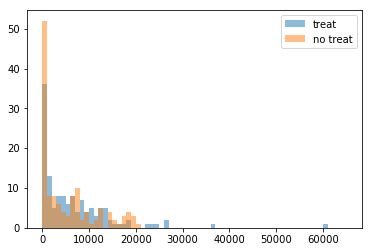

In [214]:
plot_matching_hist(matching_propensity_max_card, 0.4)

And at 0.2:

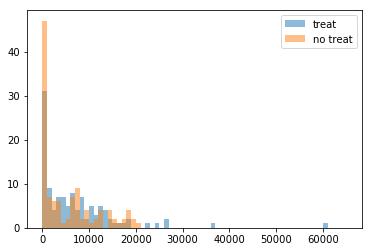

In [215]:
plot_matching_hist(matching_propensity_max_card, 0.2)

At 0.1 (very similar propensity scores):

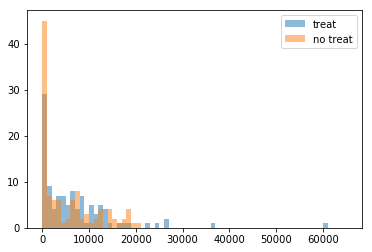

In [216]:
plot_matching_hist(matching_propensity_max_card, 0.1)

At 0.05 (very very similar propensity scores)

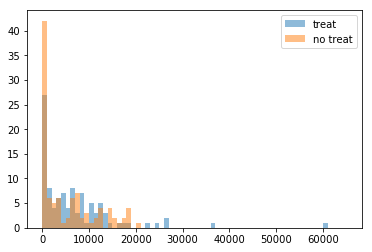

In [217]:
plot_matching_hist(matching_propensity_max_card, 0.05)

At 0 (Exactly the same propensity scores) :

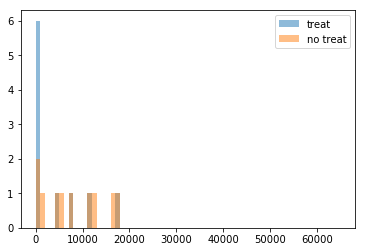

In [218]:
plot_matching_hist(matching_propensity_max_card, 0)

The general thing we always see no matter the threshold is that the treat group always has those outliers who have really big salaries (except in the threshold 0 case where they do not appear).

Now we might try to get rid of some columns to see if we can get better insights.

## Question 2: Applied ML

In [21]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroup_train = fetch_20newsgroups(subset="train")
pprint(list(newsgroup_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroup_train.data)
vectors.shape

(11314, 130107)

In [27]:
vectors_test.shape

(7532, 130107)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
newsgroup_test = fetch_20newsgroups(subset="test")
vectors_test = vectorizer.transform(newsgroup_test.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroup_train.target)
pred = clf.predict(vectors_test)
metrics.f1_score(newsgroup_test.target, pred, average="macro")

0.82906596444740432

In [37]:
newsgroup = fetch_20newsgroups(subset="all", remove=('headers', 'footers', 'quotes'))

In [34]:
newsgroup.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [35]:
newsgroup.target

array([10,  3, 17, ...,  3,  1,  7])

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroup.data)
vectors.shape

(18846, 134410)

In [36]:
newsgroup.filenames

array([ '/home/ahmed/scikit_learn_data/20news_home/20news-bydate-test/rec.sport.hockey/54367',
       '/home/ahmed/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60215',
       '/home/ahmed/scikit_learn_data/20news_home/20news-bydate-train/talk.politics.mideast/76120',
       ...,
       '/home/ahmed/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695',
       '/home/ahmed/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319',
       '/home/ahmed/scikit_learn_data/20news_home/20news-bydate-test/rec.autos/103195'],
      dtype='<U92')

In [43]:
X = vectors
y = newsgroup.target

In [54]:
from sklearn.model_selection import train_test_split
X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size=0.1)

# Here we put 0.11111111 because 0.1111111... * 0.9 = 0.1 which will give 80% / 10% / 10%
X_train, X_val, y_train, y_val = train_test_split(X_fit, y_fit, test_size=0.111111112)

Let's make a little preview depending on the number of estimators:

In [64]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.45835543766578252

In [63]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6408488063660478

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.65729442970822283

As if the score increases depending on the number of estimators. Let's perform a grid search on the number of trees to see what is happening with more details:

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=200)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.64827586206896548

In [87]:
fit_total = X_fit.shape[0]
n_val = int(fit_total * 0.1111111)
n_train = fit_total - n_val
ps_array = [0] * n_train + [1] * n_val

In [88]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
n_estimators_space = np.logspace(0, 3, num=10, dtype='int')
max_depth_space = np.logspace(0, 3, num=10, dtype='int')
rfc = RandomForestClassifier()
clf_grid = GridSearchCV(rfc, param_grid={'n_estimators':n_estimators_space, 'max_depth':max_depth_space}, verbose=2, cv=PredefinedSplit(ps_array))
clf_grid.fit(X_fit, y_fit)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ...................... max_depth=1, n_estimators=1, total=   0.1s
[CV] max_depth=1, n_estimators=1 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... max_depth=1, n_estimators=1, total=   0.1s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ...................... max_depth=1, n_estimators=2, total=   0.1s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ...................... max_depth=1, n_estimators=2, total=   0.1s
[CV] max_depth=1, n_estimators=4 .....................................
[CV] ...................... max_depth=1, n_estimators=4, total=   0.2s
[CV] max_depth=1, n_estimators=4 .....................................
[CV] ...................... max_depth=1, n_estimators=4, total=   0.1s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.2s
[CV] max_depth=1, n_estimators=10 ....................................
[CV] ..................... max_depth=1, n_estimators=10, total=   0.1s
[CV] max_depth=1, n_estimators=21 ....................................
[CV] .

[CV] ................... max_depth=4, n_estimators=1000, total=  17.3s
[CV] max_depth=10, n_estimators=1 ....................................
[CV] ..................... max_depth=10, n_estimators=1, total=   0.1s
[CV] max_depth=10, n_estimators=1 ....................................
[CV] ..................... max_depth=10, n_estimators=1, total=   0.1s
[CV] max_depth=10, n_estimators=2 ....................................
[CV] ..................... max_depth=10, n_estimators=2, total=   0.1s
[CV] max_depth=10, n_estimators=2 ....................................
[CV] ..................... max_depth=10, n_estimators=2, total=   0.2s
[CV] max_depth=10, n_estimators=4 ....................................
[CV] ..................... max_depth=10, n_estimators=4, total=   0.2s
[CV] max_depth=10, n_estimators=4 ....................................
[CV] ..................... max_depth=10, n_estimators=4, total=   0.3s
[CV] max_depth=10, n_estimators=10 ...................................
[CV] .

[CV] ................... max_depth=46, n_estimators=464, total= 2.5min
[CV] max_depth=46, n_estimators=1000 .................................
[CV] .................. max_depth=46, n_estimators=1000, total=  47.6s
[CV] max_depth=46, n_estimators=1000 .................................
[CV] .................. max_depth=46, n_estimators=1000, total= 5.3min
[CV] max_depth=100, n_estimators=1 ...................................
[CV] .................... max_depth=100, n_estimators=1, total=   0.2s
[CV] max_depth=100, n_estimators=1 ...................................
[CV] .................... max_depth=100, n_estimators=1, total=   0.8s
[CV] max_depth=100, n_estimators=2 ...................................
[CV] .................... max_depth=100, n_estimators=2, total=   0.2s
[CV] max_depth=100, n_estimators=2 ...................................
[CV] .................... max_depth=100, n_estimators=2, total=   1.5s
[CV] max_depth=100, n_estimators=4 ...................................
[CV] .

KeyboardInterrupt: 

In [85]:
n_val = int(X_fit.shape[0] * 0.1111111)
len([0] * n_val + [1] * (X_fit.shape[0] - n_val))

16961

In [86]:
X_fit.shape

(16961, 134410)